# **Major project(Alkaline and Acid Leaching)**
****GPR Model Analysis****

> **Alkaline leaching Process (NaOH Treated)**

In [1]:
#Importing neccessory libraries
import re
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import ConstantKernel, ExpSineSquared
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# # Loading the KOH Treated Alkaline leaching Process dataset
# data = pd.read_csv('/kaggle/input/dissolution-project-dataset/KOH_Alkaline_Leaching_dataset.csv')
# data = data.drop('Run', axis=1)

In [3]:
# Loading the NaOh Treated Alkaline leaching Process dataset
data = pd.read_csv('/kaggle/input/dissolution-project-dataset/NaOH_Alkaline _Leaching_dataset.csv')
data = data.drop('Run', axis=1)
print('NaOH Treated')
data.head(22)

NaOH Treated


,Independent variable (A) TIME (hr),Independent variable (B) Temperature (°C),Independent variable (C) Concentration (wt.%),Independent variable (D) L/S Ratio,Dependent variable 1 Dissolution % SiO2,Dependent variable 2 Dissolution % Al2O3,Dependent variable 3 Al/Si Ratio
0,0.5,100,20,5,21.00,4.03,0.62
1,1.0,100,20,5,30.92,3.62,1.14
2,1.5,100,20,5,35.79,2.19,1.25
3,2.0,100,20,5,48.24,2.04,1.44
4,2.5,100,20,5,45.42,2.04,1.39
5,3.0,100,20,5,42.27,1.90,1.33
6,2.0,50,20,5,22.67,4.70,0.84
7,2.0,75,20,5,40.17,3.80,1.35
8,2.0,100,20,5,50.78,3.10,1.51
9,2.0,130,20,5,46.85,2.20,1.42


In [4]:
# data = data.drop(data.index[13])

In [5]:
# #KOH Treated For Alkaline leaching Process


# data = data.reset_index(drop=True)
# print("KOH Treated")
# data.head(23)

In [6]:
# Defining the independent and dependent variables
X = data[['Independent variable (A)    TIME (hr)', 'Independent variable (B)  Temperature  (°C)', 'Independent variable (C) Concentration (wt.%)', 'Independent variable (D) L/S Ratio']]
Y = data[['Dependent variable 1 Dissolution % SiO2', 'Dependent variable 2 Dissolution % Al2O3', 'Dependent variable 3 Al/Si Ratio']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, DotProduct, Matern
import pandas as pd

# Define the list of kernels to use
kernels_list = [
    RBF(length_scale=2.0)* 1.0 , 
    RationalQuadratic(length_scale=1.0, alpha=1.0)* 1.0 , 
    DotProduct(sigma_0=2.0,)**4,
    Matern(length_scale=1.0, nu=0.5)* 1.0 
]


# Training and evaluating each kernel
results = {}
for idx, kernel in enumerate(kernels_list):
    alpha = 1.0
    max_alpha = 1000.0  # Adjust as needed
    while alpha <= max_alpha:
        try:
            gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha)
            gp.fit(X_scaled, Y)
            Y_pred = gp.predict(X_scaled)
            r2 = r2_score(Y, Y_pred)
            mape = mean_absolute_percentage_error(Y, Y_pred)
            kernel_name = f'Kernel {idx + 1}: {str(kernel)}'
            results[kernel_name] = {'R2': r2, 'MAPE': mape}
            print(f'Successful fit with alpha={alpha}')
            break
        except np.linalg.LinAlgError as e:
            print(f'Failed fit with alpha={alpha}: {e}')
            alpha *= 10  # Increase alpha exponentially for each attempt
    else:
        print('Unable to find a suitable alpha value.')
    # Storing results


# Printing results
for kernel_name, metrics in results.items():
    print(kernel_name)
    print(f'R2: {metrics["R2"]:.4f}')
    print(f'MAPE: {metrics["MAPE"]:.4f}')
    print()


Successful fit with alpha=1.0
Successful fit with alpha=1.0
Successful fit with alpha=1.0
Successful fit with alpha=1.0
Kernel 1: RBF(length_scale=2) * 1**2
R2: 0.9285
MAPE: 0.0535

Kernel 2: RationalQuadratic(alpha=1, length_scale=1) * 1**2
R2: 0.9540
MAPE: 0.0351

Kernel 3: DotProduct(sigma_0=2) ** 4
R2: 0.9420
MAPE: 0.0389

Kernel 4: Matern(length_scale=1, nu=0.5) * 1**2
R2: 0.9566
MAPE: 0.0315



In [8]:
from IPython.display import Markdown, display

unwanted_parts = [
    r'\(length_scale=1, nu=0.5\)',
    r'\(length_scale=1, periodicity=7\)',
    r'\(alpha=1, length_scale=1\)',
    r'\(length_scale=1\)',
    r'\* 1\*\*2',
    r'^Dependent variable \d\s',
    
]
# Predicting target variables for the first 22 rows
gp_final = GaussianProcessRegressor(kernel=kernels_list[2],alpha=10000.0, random_state=0)
# gp_final = GaussianProcessRegressor(kernel=kernels_list[0], random_state=0)
gp_final.fit(X, Y)  # Using the entire dataset for training
predicted_values = gp_final.predict(X[:22])

# Creating a new DataFrame with predicted values
predicted_df = pd.DataFrame(predicted_values, columns=[f'Predicted_{col}' for col in Y.columns[:3]])

final_data = pd.concat([data, predicted_df], axis=1)

kernel_str = str(kernels_list[2])  # Convert the kernel to a string, Remove the '* 1**2' from the kernel string
for part in unwanted_parts:
    kernel_str = re.sub(part, '', kernel_str)
display(Markdown(f"**Kernel:** {kernel_str}"))

final_data.head(22)

/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter kernel__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


**Kernel:** DotProduct(sigma_0=2) ** 4

,Independent variable (A) TIME (hr),Independent variable (B) Temperature (°C),Independent variable (C) Concentration (wt.%),Independent variable (D) L/S Ratio,Dependent variable 1 Dissolution % SiO2,Dependent variable 2 Dissolution % Al2O3,Dependent variable 3 Al/Si Ratio,Predicted_Dependent variable 1 Dissolution % SiO2,Predicted_Dependent variable 2 Dissolution % Al2O3,Predicted_Dependent variable 3 Al/Si Ratio
0,0.5,100,20,5,21.00,4.03,0.62,21.852181,4.228630,0.670516
1,1.0,100,20,5,30.92,3.62,1.14,27.277932,2.852279,0.981052
2,1.5,100,20,5,35.79,2.19,1.25,36.928605,2.552598,1.258422
3,2.0,100,20,5,48.24,2.04,1.44,45.959544,2.713130,1.448211
4,2.5,100,20,5,45.42,2.04,1.39,49.501406,2.721310,1.495859
5,3.0,100,20,5,42.27,1.90,1.33,42.686693,1.959466,1.346686
6,2.0,50,20,5,22.67,4.70,0.84,23.551392,4.841654,0.870868
7,2.0,75,20,5,40.17,3.80,1.35,33.585501,2.737548,1.119856
8,2.0,100,20,5,50.78,3.10,1.51,45.959544,2.713130,1.448211
9,2.0,130,20,5,46.85,2.20,1.42,50.870506,2.850093,1.560397


R-squared (R2) Score: Also known as the coefficient of determination, R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 values (close to 1) indicate better model fit.

MAPE stands for Mean Absolute Percentage Error. In the context of your code, MAPE is calculated as follows:

1. First, the absolute percentage error (APE) is calculated for each prediction. This is done by taking the absolute difference between the actual value (`y`) and the predicted value (`y_pred`), divided by the actual value (`y`), and then multiplied by 100 to convert it to a percentage.

   \[
   APE = \left| \frac{{y - y_{pred}}}{{y}} \right| \times 100
   \]

2. After calculating the APE for each prediction, the mean of these absolute percentage errors is computed to get the Mean Absolute Percentage Error (MAPE).

   \[
   MAPE = \frac{{\sum APE}}{{n}}
   \]

Here's a breakdown of how MAPE is calculated within your code:

- `np.abs((y - y_pred) / np.where(y == 0, 1, y))`: This calculates the absolute percentage error for each prediction, handling cases where the actual value `y` might be zero (to avoid division by zero).
- `np.mean(...) * 100`: This computes the mean of the absolute percentage errors calculated above and converts it to a percentage by multiplying by 100.

MAPE is a measure of prediction accuracy, indicating the average percentage difference between predicted and actual values. Lower MAPE values indicate better accuracy, while higher values suggest larger prediction errors on average.

# Dataset export

In [9]:
# #For NaOH Treated For Alkaline leaching Process
# new_data_combined.to_excel('/kaggle/working/NaOH_Predicted_Alkaline_leaching_dataset.xlsx')
# new_data_combined.to_csv('/kaggle/working/NaOH_Predicted_Alkaline_leaching_dataset.csv')

# Data Visualization 

In [10]:
# Independent variables (X)
X_data = final_data[['Independent variable (A)    TIME (hr)', 'Independent variable (B)  Temperature  (°C)', 'Independent variable (C) Concentration (wt.%)', 'Independent variable (D) L/S Ratio']]

# Dependent variables (y_columns)
Y_data = final_data[['Predicted_Dependent variable 1 Dissolution % SiO2','Predicted_Dependent variable 2 Dissolution % Al2O3','Predicted_Dependent variable 3 Al/Si Ratio'
                              ]]


In [11]:
X_data.head(22)

,Independent variable (A) TIME (hr),Independent variable (B) Temperature (°C),Independent variable (C) Concentration (wt.%),Independent variable (D) L/S Ratio
0,0.5,100,20,5
1,1.0,100,20,5
2,1.5,100,20,5
3,2.0,100,20,5
4,2.5,100,20,5
5,3.0,100,20,5
6,2.0,50,20,5
7,2.0,75,20,5
8,2.0,100,20,5
9,2.0,130,20,5


In [12]:
Y_data.head(22)

,Predicted_Dependent variable 1 Dissolution % SiO2,Predicted_Dependent variable 2 Dissolution % Al2O3,Predicted_Dependent variable 3 Al/Si Ratio
0,21.852181,4.228630,0.670516
1,27.277932,2.852279,0.981052
2,36.928605,2.552598,1.258422
3,45.959544,2.713130,1.448211
4,49.501406,2.721310,1.495859
5,42.686693,1.959466,1.346686
6,23.551392,4.841654,0.870868
7,33.585501,2.737548,1.119856
8,45.959544,2.713130,1.448211
9,50.870506,2.850093,1.560397


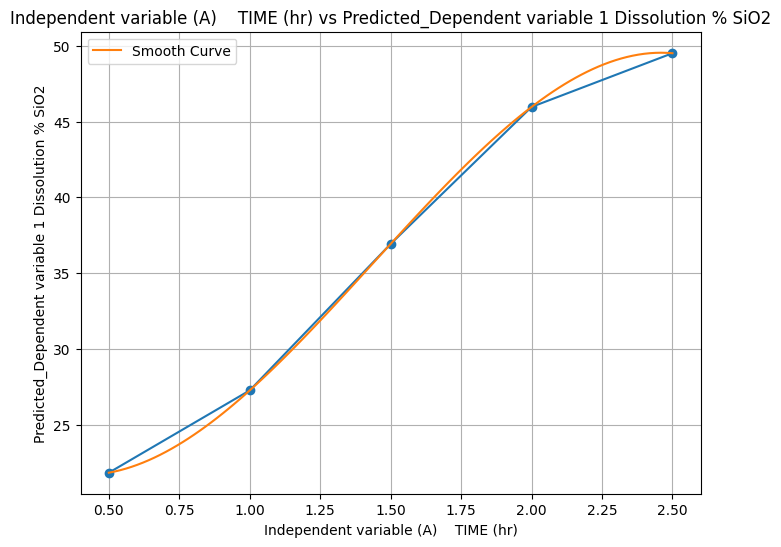

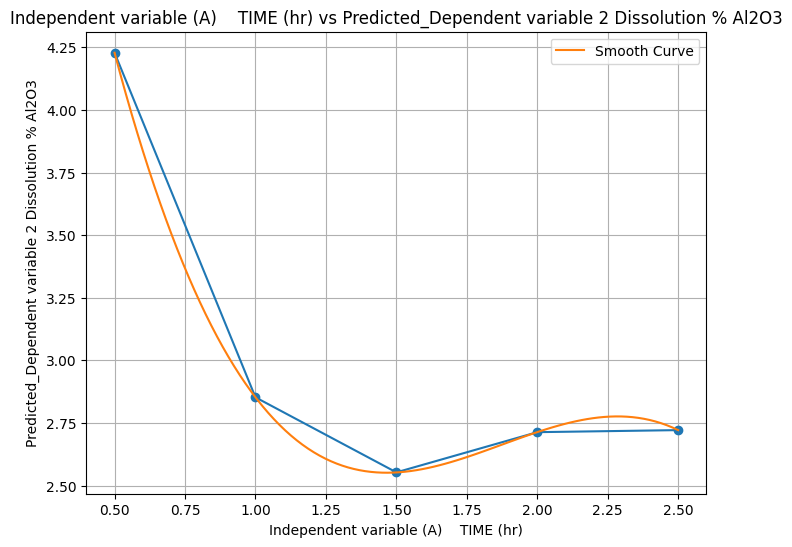

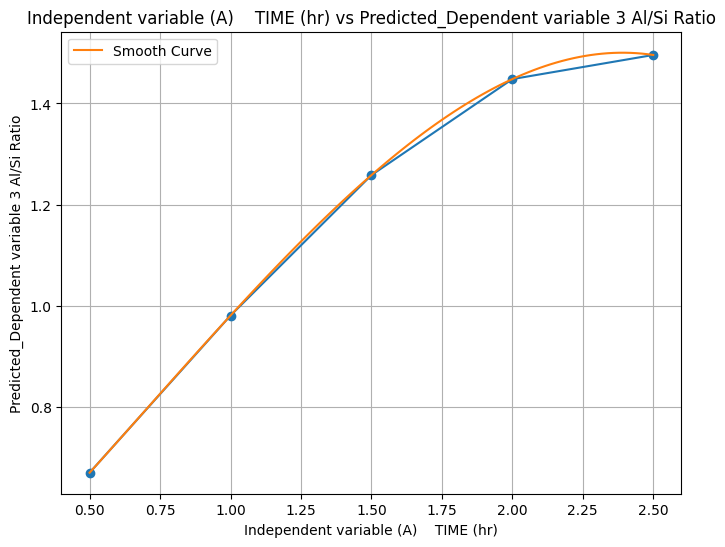

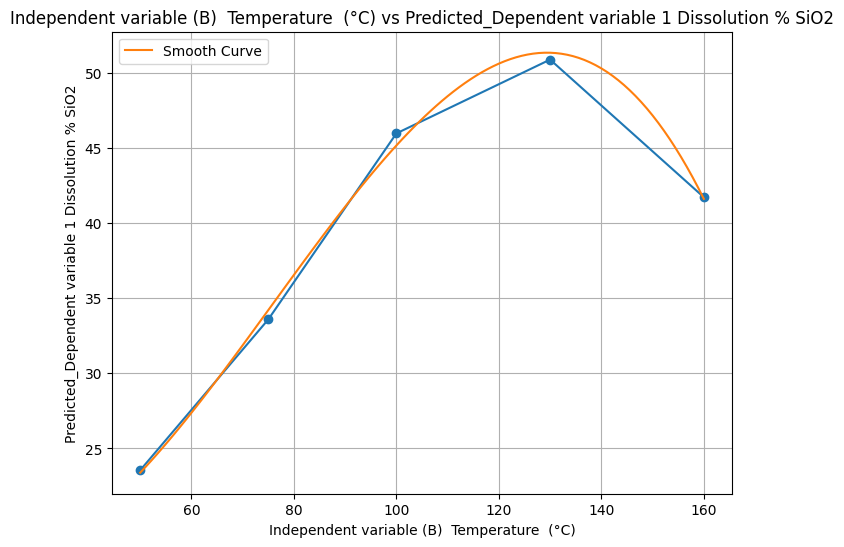

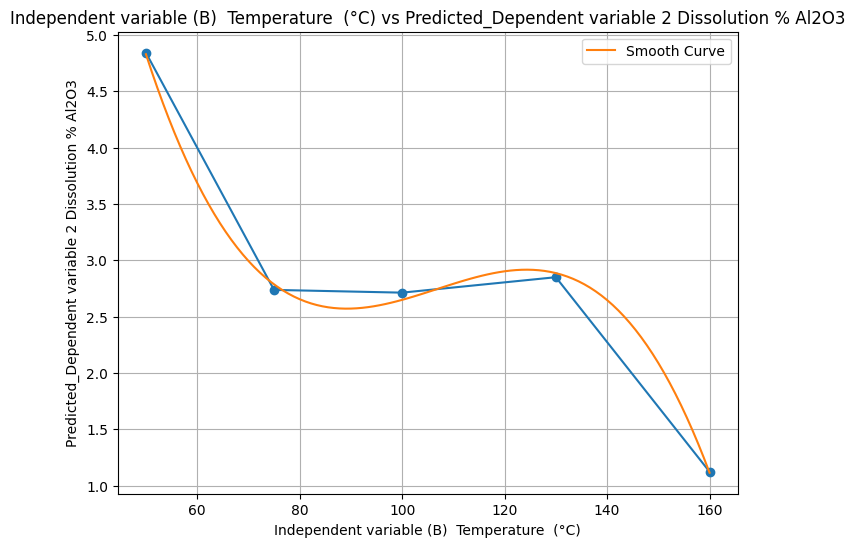

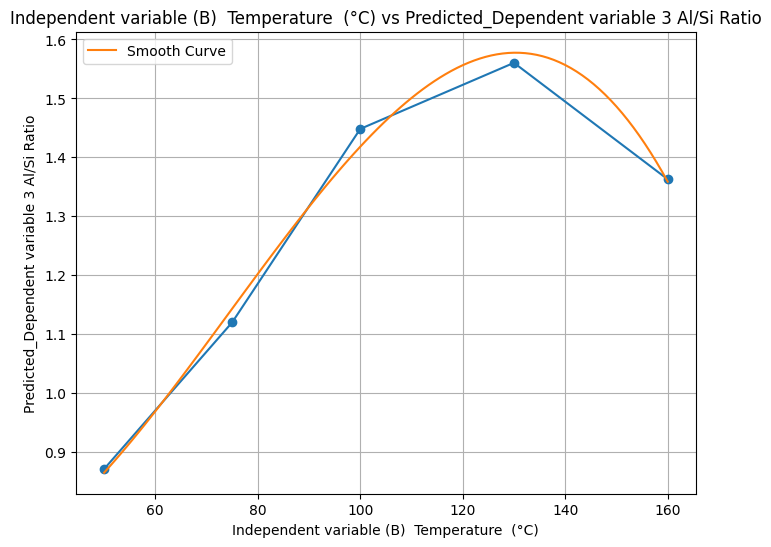

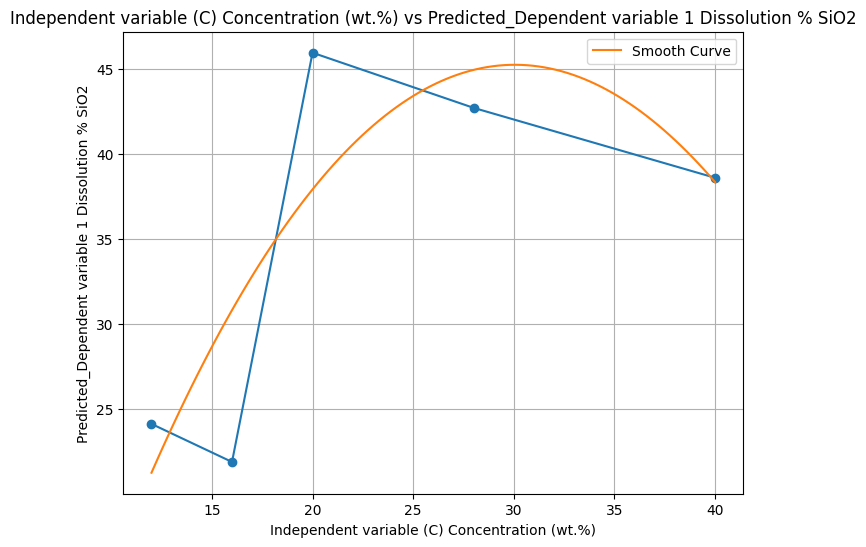

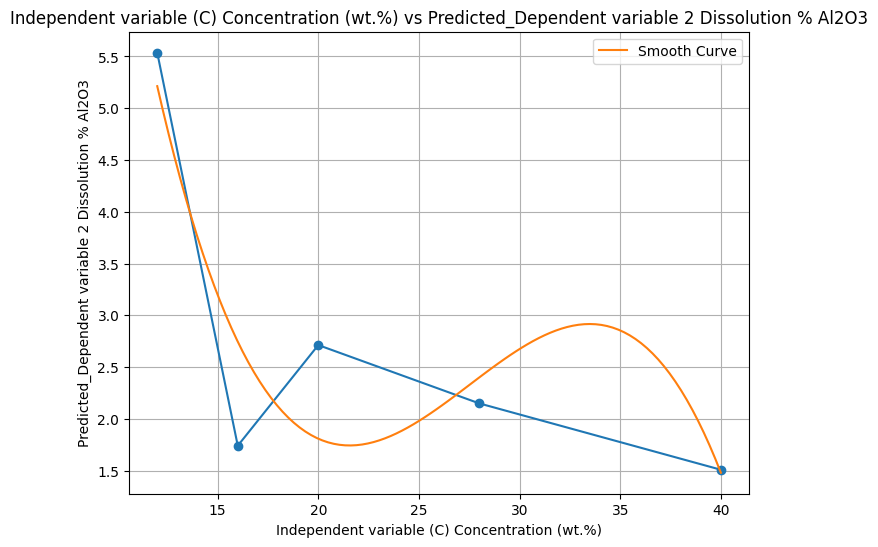

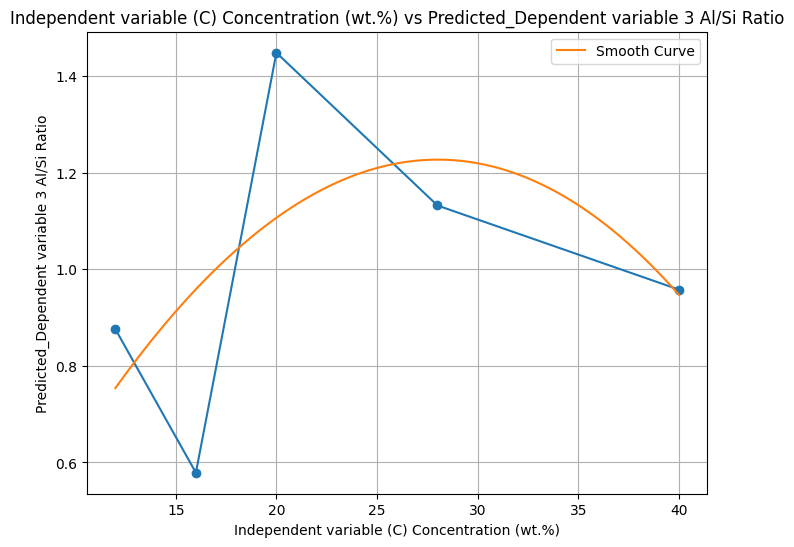

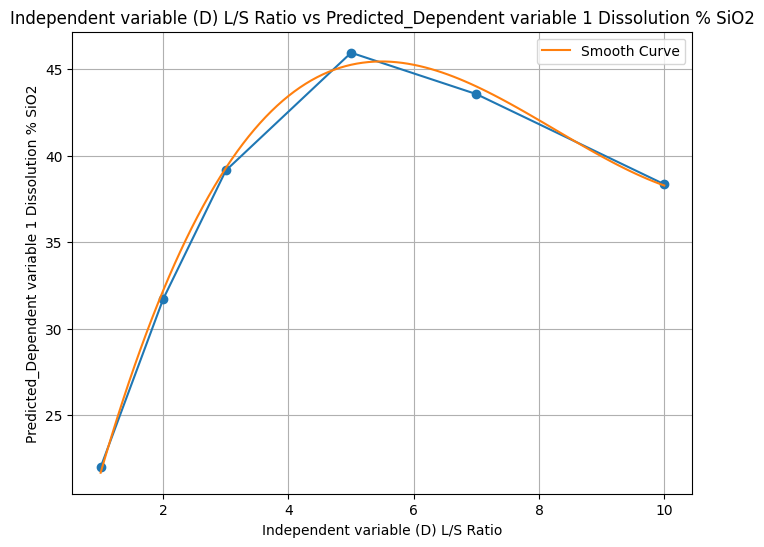

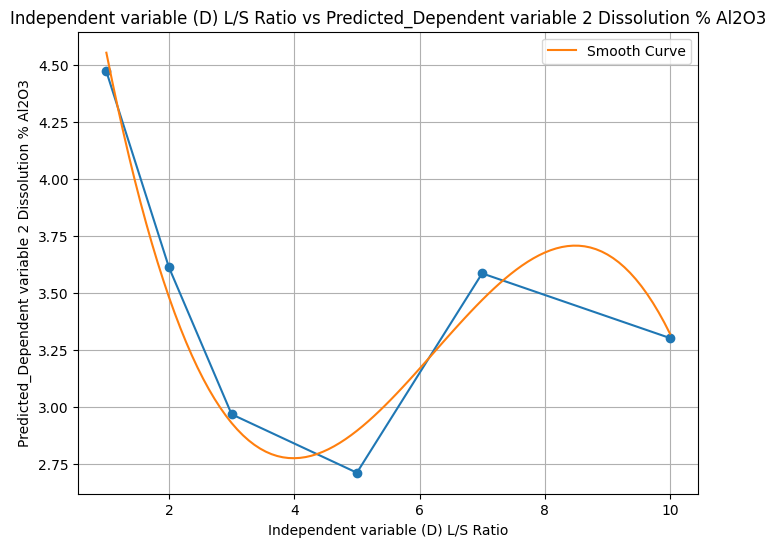

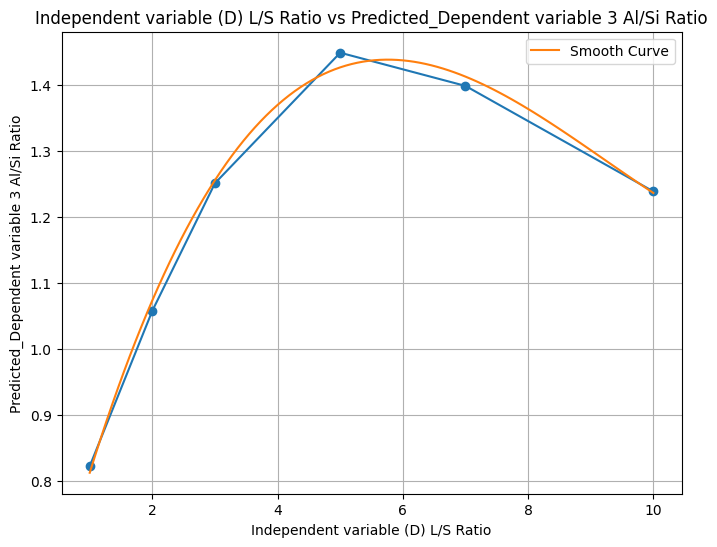

In [13]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

# Define the format for selecting values from X_data and Y_data
format_dict = {
    'Independent variable (A)    TIME (hr)': slice(0, 5),
    'Independent variable (B)  Temperature  (°C)': slice(6, 11),
    'Independent variable (C) Concentration (wt.%)': slice(11, 16),
    'Independent variable (D) L/S Ratio': slice(16, 22)  # Changed to match the number of values
}

# Create a PDF file to save the plots
pdf_filename = "/kaggle/working/KOH_predicted_graphs.pdf"
pdf_pages = PdfPages(pdf_filename)

# Iterate through X_data columns
for x_col in X_data.columns:
    x_values = X_data[x_col][format_dict[x_col]]
    
    # Iterate through Y_data columns
    for y_col in Y_data.columns:
        y_values = Y_data[y_col][format_dict[x_col]]
        
        # Plot the smooth line graph using numpy's polyfit and poly1d
        plt.figure(figsize=(8, 6))
        plt.plot(x_values, y_values, marker='o')
        
        # Fit a polynomial of degree 3 (cubic polynomial) to smooth the curve
        coeffs = np.polyfit(x_values, y_values, 3)
        poly = np.poly1d(coeffs)
        
        # Generate points along the curve for smoother visualization
        x_smooth = np.linspace(x_values.min(), x_values.max(), 100)
        y_smooth = poly(x_smooth)
        
        # Plot the smoothed curve
        plt.plot(x_smooth, y_smooth, label='Smooth Curve')
        
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'{x_col} vs {y_col}')
        plt.legend()
        plt.grid(True)
        
        # Save the figure to the PDF file
#         pdf_pages.savefig()
#         plt.close()
        plt.show()

# # Close the PDF file
# pdf_pages.close()

# # Print the path to the saved PDF file
# print(f"Smooth line graphs saved to: {pdf_filename}")